# Attributes 
id: Identification Number

num: Number of the Pokémon in the official Pokédex

name: Pokémon name

img: URL to an image of this Pokémon

type: Pokémon type

height: Pokémon height

weight: Pokémon weight

candy: type of candy used to evolve Pokémon or given when transfered

candy_count: amount of candies required to evolve

egg: Number of kilometers to travel to hatch the egg

spawn_chance: Percentage of spawn chance (NEW)

avg_spawns: Number of this pokemon on 10.000 spawns (NEW)

spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW)

multipliers: Multipler of Combat Power (CP) for calculating the CP after evolution See below

weakness: Types of Pokémon this Pokémon is weak to

next_evolution: Number and Name of successive evolutions of Pokémon

prev_evolution: Number and Name of previous evolutions of Pokémon

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#loading the json file
with open('C:\\Users\\MGC\\pokedex.json') as f:
     json_data = json.load(f)

In [48]:
# Extracting the data array from the JSON
data_array = json_data["pokemon"]

# Converting the JSON data to a DataFrame
df = pd.DataFrame(data_array)


In [49]:
df.drop(["id", "num"],axis=1, inplace=True )

## VISUALIZING THE DATA

<Figure size 2880x2160 with 0 Axes>

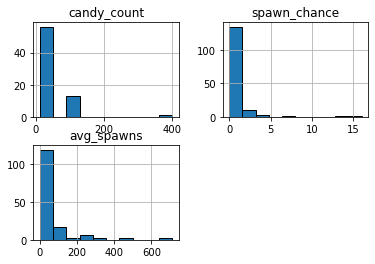

In [50]:
# Select columns for the histogram
columns = ["height", "weight", "candy_count", "spawn_chance", "avg_spawns"]

# Set figure size
plt.figure(figsize=(40, 30))

# Plotting histogram
df.drop(["multipliers", "weaknesses", "next_evolution", "prev_evolution", "type"], axis=1).hist(column=columns, bins=10, edgecolor='black')

# Set x-axis labels
plt.xlabel("Value", fontsize=30)

# Set y-axis labels
plt.ylabel("Frequency", fontsize=30)

# Set title
plt.title("Histogram of Pokemon Attributes", fontsize=40)

# Set tick font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Show the plot
plt.show()


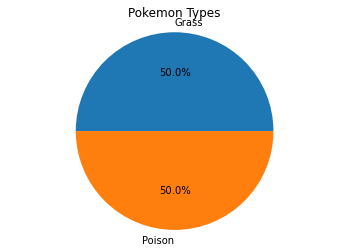

In [51]:
types = ['Grass', 'Poison']

# Pie chart
plt.pie([1, 1], labels=types, autopct='%1.1f%%')
plt.title('Pokemon Types')
plt.axis('equal')
plt.show()


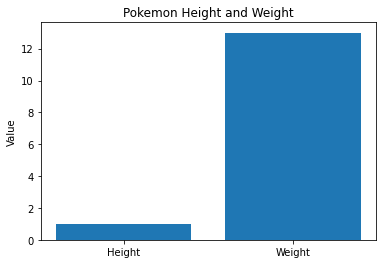

In [52]:
import matplotlib.pyplot as plt

height = 0.99
weight = 13.0

# Bar plot
plt.bar(['Height', 'Weight'], [height, weight])
plt.ylabel('Value')
plt.title('Pokemon Height and Weight')
plt.show()


C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


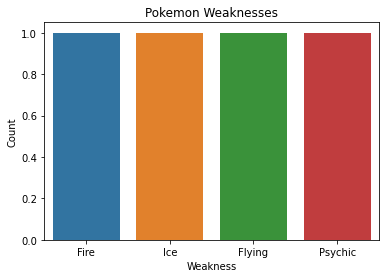

In [53]:
weaknesses = ['Fire', 'Ice', 'Flying', 'Psychic']

# Count plot
sns.countplot(weaknesses)
plt.xlabel('Weakness')
plt.ylabel('Count')
plt.title('Pokemon Weaknesses')
plt.show()


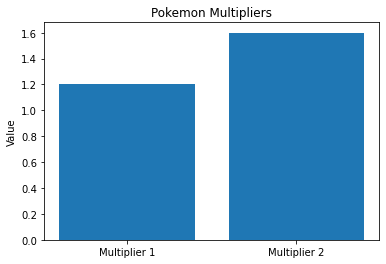

In [54]:
multipliers = [1.2, 1.6]

# Bar plot
plt.bar(range(len(multipliers)), multipliers)
plt.xticks(range(len(multipliers)), ['Multiplier 1', 'Multiplier 2'])
plt.ylabel('Value')
plt.title('Pokemon Multipliers')
plt.show()


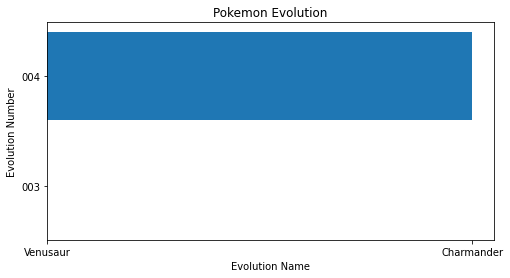

In [55]:
evolution = [{'num': '003', 'name': 'Venusaur'}, {'num': '004', 'name': 'Charmander'}]

# Extract evolution names and numbers
evolution_names = [e['name'] for e in evolution]
evolution_numbers = [e['num'] for e in evolution]

# Horizontal bar plot
plt.figure(figsize=(8, 4))
plt.barh(evolution_numbers, evolution_names)
plt.xlabel('Evolution Name')
plt.ylabel('Evolution Number')
plt.title('Pokemon Evolution')
plt.show()


### Getting all Pokemons whose spawn rate is less than 5%


In [71]:
spawn_rate_threshold = 0.05
pokemon_spawn_rate_lt_5 = df[df['spawn_chance'] < spawn_rate_threshold]
pokemon_spawn_rate_lt_5

,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,seconds
1,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",25200
2,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",41400
4,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",68400
5,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,None,"[Water, Electric, Rock]",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':...",48840
7,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,[Water],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"[Electric, Grass]","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]",25320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,0,None,"[Water, Electric, Rock]",NaN,NaN,0
147,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",43020
148,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",85080
149,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,0,None,"[Bug, Ghost, Dark]",NaN,NaN,0


### Getting all Pokemons that have less than 4 weaknesses


In [73]:
max_weaknesses = 4
pokemon_less_than_4_weaknesses = df[df['weaknesses'].apply(lambda x: len(x)) < max_weaknesses]
pokemon_less_than_4_weaknesses

,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,seconds
3,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,31500
4,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",68400
5,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,None,"[Water, Electric, Rock]",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':...",48840
6,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,[Water],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,04:25,[2.1],"[Electric, Grass]","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,15900
7,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,[Water],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"[Electric, Grass]","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]",25320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,0,None,"[Water, Electric, Rock]",NaN,NaN,0
146,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,24060
147,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",43020
149,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,0,None,"[Bug, Ghost, Dark]",NaN,NaN,0


### Getting all Pokemons that have no multipliers at all

In [76]:
for i in df['multipliers'].index:
    if (df["multipliers"][i]) == None:
        print(i, df["name"][i])

2 Venusaur
5 Charizard
8 Blastoise
11 Butterfree
14 Beedrill
17 Pidgeot
19 Raticate
21 Fearow
23 Arbok
25 Raichu
27 Sandslash
30 Nidoqueen
33 Nidoking
35 Clefable
37 Ninetales
39 Wigglytuff
41 Golbat
44 Vileplume
46 Parasect
48 Venomoth
50 Dugtrio
52 Persian
54 Golduck
56 Primeape
58 Arcanine
61 Poliwrath
64 Alakazam
67 Machamp
70 Victreebel
72 Tentacruel
75 Golem
77 Rapidash
79 Slowbro
81 Magneton
82 Farfetch'd
84 Dodrio
86 Dewgong
88 Muk
90 Cloyster
93 Gengar
94 Onix
96 Hypno
98 Kingler
100 Electrode
102 Exeggutor
104 Marowak
105 Hitmonlee
106 Hitmonchan
107 Lickitung
109 Weezing
111 Rhydon
112 Chansey
113 Tangela
114 Kangaskhan
116 Seadra
118 Seaking
120 Starmie
121 Mr. Mime
122 Scyther
123 Jynx
124 Electabuzz
125 Magmar
126 Pinsir
127 Tauros
129 Gyarados
130 Lapras
131 Ditto
133 Vaporeon
134 Jolteon
135 Flareon
136 Porygon
138 Omastar
140 Kabutops
141 Aerodactyl
142 Snorlax
143 Articuno
144 Zapdos
145 Moltres
148 Dragonite
149 Mewtwo
150 Mew


### Getting all Pokemons that do not have more than 2 evolutions

In [104]:
def count_evolution(row):
    count = 0
    if isinstance(row['next_evolution'], list):
        count += len(row['next_evolution'])
    if isinstance(row['prev_evolution'], list):
        count += len(row['prev_evolution'])
    return count

df['count'] = df.apply(count_evolution, axis=1)

In [92]:
for i in df["count"].index:
    if df["count"][i] <= 2:
        print(df["name"][i])

Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Weedle
Kakuna
Beedrill
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran â™€ (Female)
Nidorina
Nidoqueen
Nidoran â™‚ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Zubat
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan
Horsea


### Getting all Pokemons whose spawn time is less than 300 seconds

In [93]:
df["spawn_time"].replace("N/A", 0, inplace=True)

In [94]:
def convert_to_seconds(time_str):
    if pd.isnull(time_str) or time_str == "" or time_str == 0:
        return time_str
    else:
        time_components = str(time_str).split(":")
        seconds = int(time_components[0]) * 3600 + int(time_components[1]) * 60
        return seconds

df['seconds'] = df['spawn_time'].apply(convert_to_seconds)

print(df['seconds'])


0      72000
1      25200
2      41400
3      31500
4      68400
       ...  
146    24060
147    43020
148    85080
149        0
150        0
Name: seconds, Length: 151, dtype: int64


In [95]:
spawn_time_threshold = 300
pokemon_spawn_time_lt_300 = df[df['seconds'] < spawn_time_threshold]

In [96]:
pokemon_spawn_time_lt_300

,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,seconds,count
131,Ditto,http://www.serebii.net/pokemongo/pokemon/132.png,[Normal],0.30 m,4.0 kg,None,NaN,Not in Eggs,0.0,0.0,0,None,[Fighting],NaN,NaN,0,0
143,Articuno,http://www.serebii.net/pokemongo/pokemon/144.png,"[Ice, Flying]",1.70 m,55.4 kg,None,NaN,Not in Eggs,0.0,0.0,0,None,"[Fire, Electric, Rock, Steel]",NaN,NaN,0,0
144,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,NaN,Not in Eggs,0.0,0.0,0,None,"[Ice, Rock]",NaN,NaN,0,0
145,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0,0.0,0,None,"[Water, Electric, Rock]",NaN,NaN,0,0
149,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0,0.0,0,None,"[Bug, Ghost, Dark]",NaN,NaN,0,0
150,Mew,http://www.serebii.net/pokemongo/pokemon/151.png,[Psychic],0.41 m,4.0 kg,None,NaN,Not in Eggs,0.0,0.0,0,None,"[Bug, Ghost, Dark]",NaN,NaN,0,0


### Pokemon with more than two types of capabilities

In [97]:
filtered_pokemon = df[df['type'].apply(lambda x: len(x) > 2)]

# Print the filtered Pokemon
print(filtered_pokemon)


Empty DataFrame
Columns: [name, img, type, height, weight, candy, candy_count, egg, spawn_chance, avg_spawns, spawn_time, multipliers, weaknesses, next_evolution, prev_evolution, seconds, count]
Index: []


No pokemon have more than two types of capabilities